# Project 2: Pipelines and optimisations

# Part 1: Data exploration

# 1.1   what a frequency is:
              In general, frequency is a measurement of how often something happens in a period of time.

# 1.2  what the median frequency means
              

# 1.3  what the output label is:
             Output lavel is our prediction the voice is either male or female. We need to convert in binary format 1 or 0.  

# Data preprocessing

In [18]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [19]:
#data_url = "https://github.com/sarker24/ML_Assignment02/blob/master/voice.csv"
#df = pd.read_csv(data_url)
df = pd.read_csv(r'C:\Users\sarke\Desktop\Ml_Assignment02\voice.csv')

In [20]:
df.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2029,0.110500,0.100262,0.072841,0.001550,0.215941,0.214391,25.047816,683.368036,0.782244,0.392785,...,0.110500,0.155282,0.016736,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,female
2272,0.214582,0.032225,0.217439,0.201035,0.231553,0.030518,2.033460,6.309048,0.843965,0.199944,...,0.214582,0.175978,0.047761,0.271186,0.984809,0.210938,6.445312,6.234375,0.152111,female
3162,0.146023,0.092525,0.183434,0.041747,0.224337,0.182590,1.384981,5.118927,0.948999,0.659825,...,0.146023,0.195640,0.039506,0.275862,0.533854,0.007812,2.992188,2.984375,0.258924,female
2733,0.195983,0.043162,0.189241,0.165586,0.228828,0.063241,1.740913,6.555623,0.887627,0.302533,...,0.195983,0.158865,0.048632,0.277457,0.473895,0.023438,1.007812,0.984375,0.222008,female
428,0.182306,0.063664,0.202391,0.123261,0.235362,0.112101,2.871496,14.276294,0.921860,0.580524,...,0.182306,0.107974,0.029466,0.231884,0.670759,0.132812,4.265625,4.132812,0.181765,male


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [22]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


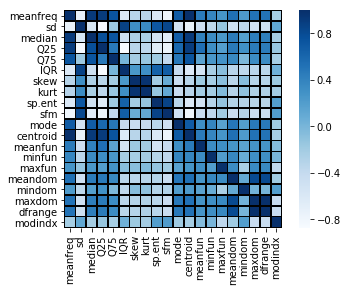

In [23]:
sns.heatmap(df.corr(),linewidths=0.50,vmax=1.0, square=True, cmap="Blues", linecolor='black')

In [24]:
df.isnull().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [25]:
df.label.value_counts()



male      1584
female    1584
Name: label, dtype: int64

In [26]:
df.label = np.where(df.label.values == 'female', 1, 0)
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [27]:
X = df.drop('label', axis = 1)
Y = df.label

In [28]:
X.shape

(3168, 20)

In [29]:
Y.shape

(3168,)

In [39]:
from sklearn.model_selection import KFold
folder = KFold(n_splits=10)

In [40]:
cv = KFold(n_splits=10)
for training_indices, testing_indices in cv.split(X):
    print(training_indices, testing_indices)

[ 317  318  319 ... 3165 3166 3167] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 23

In [46]:
for training_indices, testing_indices in folder.split(X):
    x_train = X[training_indices]
    y_train = X[training_indices]
    x_test = X[training_indices]
    y_test = X[training_indices]

KeyError: '[ 317  318  319 ... 3165 3166 3167] not in index'